In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [7]:
X = data.drop(['Channel', 'Region'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

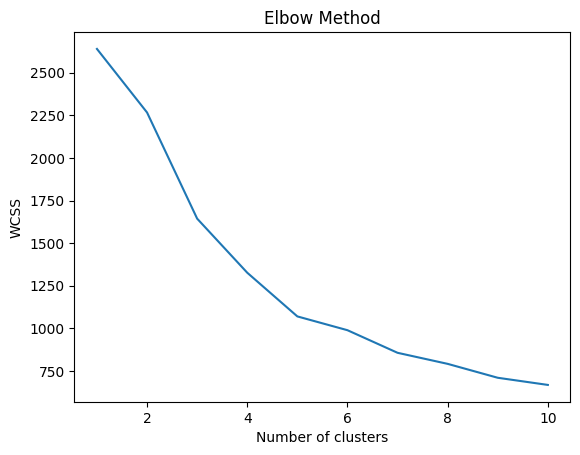

In [30]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, random_state=42)

In [ ]:
data['KMeans_Cluster'] = kmeans.labels_

In [32]:
cluster_labels=kmeans.predict(X_scaled)

In [33]:
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
pd.Series(cluster_labels).value_counts()

,count
0,350
1,53
2,37


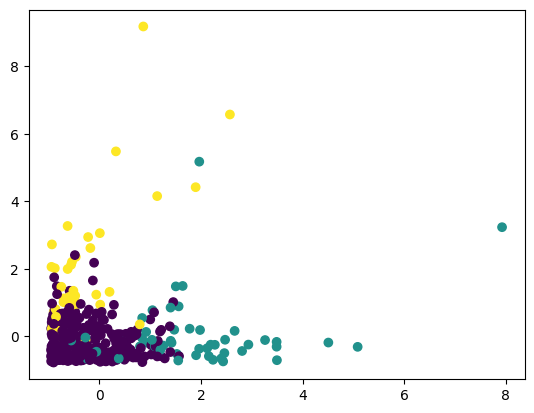

In [36]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=cluster_labels)

In [40]:
def predict_cluster(new_data_point):


  cluster = kmeans.predict([new_data_point])
  return cluster[0]

In [41]:
new_data = [100, 200, 300, 400, 500, 600]
predicted_cluster = predict_cluster(new_data)
print(f"Predicted Cluster: {predicted_cluster}")

Predicted Cluster: 2


In [43]:
#Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(data,cluster_labels)
print(silhouette_avg1)

0.46218490990811484


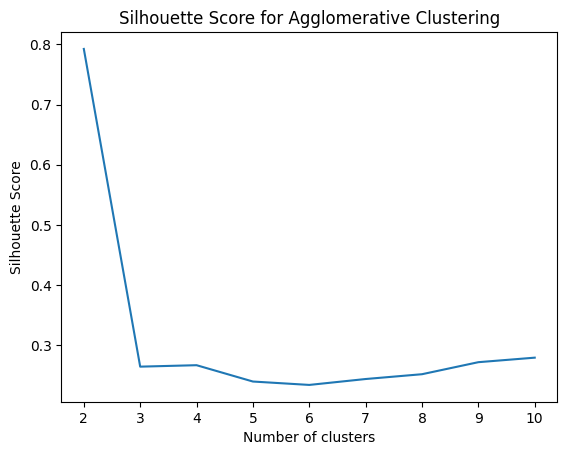

In [10]:
silhouette_scores = []
for i in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=i)
    labels = agg_clustering.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for Agglomerative Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [11]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(X_scaled)
data['Agg_Cluster'] = agg_clustering.labels_

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

DBSCAN()

In [14]:
data['DBSCAN_Cluster'] = dbscan.labels_

PCA

In [15]:
from sklearn.preprocessing import scale
scale(data)

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.47228216,
        -0.11757927,  0.75429143],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.47228216,
        -0.11757927,  0.75429143],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.47228216,
        -0.11757927, -1.20954424],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ...,  2.80022412,
        -0.11757927, -1.20954424],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.47228216,
        -0.11757927,  0.75429143],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.47228216,
        -0.11757927,  0.75429143]])

In [16]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'KMeans_Cluster', 'Agg_Cluster',
       'DBSCAN_Cluster'],
      dtype='object')

In [17]:
from sklearn.decomposition import PCA
pc=PCA(n_components=5)

In [18]:
X=pd.DataFrame(scale(data),index=data.index,columns=data.columns)

In [19]:
pc_array=pc.fit_transform(X)

In [20]:
pc_array

array([[ 1.42071565e-01, -9.64106199e-01,  7.48123858e-01,
         4.63215589e-01, -1.98898159e-01],
       [ 3.22445478e-01, -1.00651197e+00,  7.47909465e-01,
         3.54505338e-01, -5.99082861e-01],
       [ 1.20886791e+00,  2.63883437e-01,  3.81326109e-01,
         7.47084982e-01, -2.26846413e+00],
       ...,
       [ 4.42761392e+00, -1.12166305e+00, -6.92587842e-01,
         1.32319505e+00,  8.69665770e-01],
       [-1.34802664e+00,  7.46643868e-02,  8.85801240e-01,
         2.64028743e-03, -1.34257466e-02],
       [-1.51683504e+00, -6.63067986e-01,  7.65201273e-01,
         9.21962210e-03,  6.60054036e-02]])

In [21]:
pc_array.shape

(440, 5)

In [22]:
pc_array=pd.DataFrame(pc_array,columns=['PC1','PC2','PC3','PC4','PC5'])

In [23]:
pc_array.corr().round()

,PC1,PC2,PC3,PC4,PC5
PC1,1.0,0.0,-0.0,0.0,0.0
PC2,0.0,1.0,-0.0,0.0,-0.0
PC3,-0.0,-0.0,1.0,0.0,-0.0
PC4,0.0,0.0,0.0,1.0,-0.0
PC5,0.0,-0.0,-0.0,-0.0,1.0


In [24]:
pc.explained_variance_

array([4.278751  , 1.94587312, 1.05181452, 0.98909262, 0.80642729])

In [25]:
pc.explained_variance_ratio_

array([0.38809332, 0.17649552, 0.09540219, 0.08971315, 0.07314495])

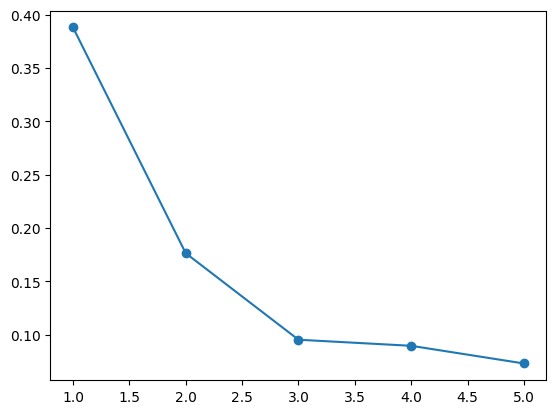

In [46]:
plt.plot([1,2,3,4,5],pc.explained_variance_ratio_,'o-')